In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [55]:
df = pd.read_csv('Hotel_Reviews.csv.zip', encoding='utf-8')
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [56]:
df.loc[df['Negative_Review'] == 'No Negative', 'Negative_Review'] = None
df.loc[df['Positive_Review'] == 'No Positive', 'Positive_Review'] = None

In [57]:
df.loc[df['Hotel_Name'] == 'Mercure Paris Gare Montparnasse', ['Hotel_Address', 'lat', 'lng']] = ('20 Rue De La Gaité 14th arr 75014 Paris France', 48.840140,2.323850)
df.loc[df['Hotel_Name'] == 'Holiday Inn Paris Montmartre', ['Hotel_Address', 'lat', 'lng']] = '23 Rue Damrémont 18th arr 75018 Paris France', 48.888300,2.333060
df.loc[df['Hotel_Name'] == 'Maison Albar Hotel Paris Op ra Diamond', ['Hotel_Address', 'lat', 'lng']] = '4 rue de la Pépinière 8th arr 75008 Paris France', 48.875180, 2.322970
df.loc[df['Hotel_Name'] == 'NH Collection Barcelona Podium', ['Hotel_Address', 'lat', 'lng']] = 'Bailén 4 6 Eixample 08010 Barcelona Spain', 41.393780, 2.174930
df.loc[df['Hotel_Name'] == 'City Hotel Deutschmeister', ['Hotel_Address', 'lat', 'lng']] = 'Grünentorgasse 30 09 Alsergrund 1090 Vienna Austria', 48.220820, 16.366640
df.loc[df['Hotel_Name'] == 'Hotel Park Villa', ['Hotel_Address', 'lat', 'lng']] = 'Hasenauerstraße 12 19 Döbling 1190 Vienna Austria', 48.233560, 16.345690
df.loc[df['Hotel_Name'] == 'Fleming s Selection Hotel Wien City', ['Hotel_Address', 'lat', 'lng']] = 'Josefstädter Straße 10 12 08 Josefstadt 1080 Vienna Austria', 48.209390, 16.353390
df.loc[df['Hotel_Name'] == 'Cordial Theaterhotel Wien', ['Hotel_Address', 'lat', 'lng']] = 'Josefstädter Straße 22 08 Josefstadt 1080 Vienna Austria', 48.209530, 16.351420
df.loc[df['Hotel_Name'] == 'Hotel Daniel Vienna', ['Hotel_Address', 'lat', 'lng']] = 'Landstraßer Gürtel 5 03 Landstraße 1030 Vienna Austria', 48.188700, 16.383710
df.loc[df['Hotel_Name'] == 'Roomz Vienna', ['Hotel_Address', 'lat', 'lng']] = 'Paragonstraße 1 11 Simmering 1110 Vienna Austria', 48.186610, 16.420580
df.loc[df['Hotel_Name'] == 'Renaissance Barcelona Hotel', ['Hotel_Address', 'lat', 'lng']] = 'Pau Claris 122 Eixample 08009 Barcelona Spain', 41.392770, 2.167450
df.loc[df['Hotel_Name'] == 'Austria Trend Hotel Schloss Wilhelminenberg Wien', ['Hotel_Address', 'lat', 'lng']] = 'Savoyenstraße 2 16 Ottakring 1160 Vienna Austria', 48.219580, 16.285510
df.loc[df['Hotel_Name'] == 'Hotel Advance', ['Hotel_Address', 'lat', 'lng']] = 'Sepulveda 180 Eixample 08011 Barcelona Spain', 41.383320, 2.162830
df.loc[df['Hotel_Name'] == 'Derag Livinghotel Kaiser Franz Joseph Vienna', ['Hotel_Address', 'lat', 'lng']] = 'Sieveringer Straße 4 19 Döbling 1190 Vienna Austria', 48.246060, 16.341010
df.loc[df['Hotel_Name'] == 'Hotel City Central', ['Hotel_Address', 'lat', 'lng']] = 'Taborstraße 8 A 02 Leopoldstadt 1020 Vienna Austria', 48.213410, 16.379880
df.loc[df['Hotel_Name'] == 'Hotel Pension Baron am Schottentor', ['Hotel_Address', 'lat', 'lng']] = 'Wöhringer Straße 12 09 Alsergrund 1090 Vienna Austria', 48.216780, 16.360010
df.loc[df['Hotel_Name'] == 'Hotel Atlanta', ['Hotel_Address', 'lat', 'lng']] = 'Wöhringer Straße 33 35 09 Alsergrund 1090 Vienna Austria', 48.220300, 16.355850

In [87]:
df['Positive_Review_clean'] = df['Positive_Review'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.lower() not in stop]) if x is not None else None)
df['Negative_Review_clean'] = df['Negative_Review'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.lower() not in stop]) if x is not None else None)

In [58]:
df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.432405,2.893478
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.460241,4.667476
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214066,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.019886
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.841163
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


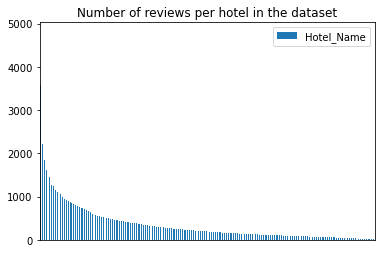

In [76]:
df['Hotel_Name'].value_counts().reset_index().plot.bar()
plt.xticks([])
plt.title('Number of reviews per hotel in the dataset')
plt.savefig('no_reviews.png')


In [95]:
df['Review_Date'] = pd.to_datetime(df['Review_Date'])
df['Review_Date'].head()

0   2017-08-03
1   2017-08-03
2   2017-07-31
3   2017-07-31
4   2017-07-24
Name: Review_Date, dtype: datetime64[ns]

In [90]:
df.nunique()

Hotel_Address                                   1493
Additional_Number_of_Scoring                     480
Review_Date                                      731
Average_Score                                     34
Hotel_Name                                      1492
Reviewer_Nationality                             227
Negative_Review                               330010
Review_Total_Negative_Word_Counts                402
Total_Number_of_Reviews                         1142
Positive_Review                               412600
Review_Total_Positive_Word_Counts                365
Total_Number_of_Reviews_Reviewer_Has_Given       198
Reviewer_Score                                    37
Tags                                           55242
days_since_review                                731
lat                                             1489
lng                                             1489
Positive_Review_clean                         383363
Negative_Review_clean                         

In [59]:
len(df.columns)

17

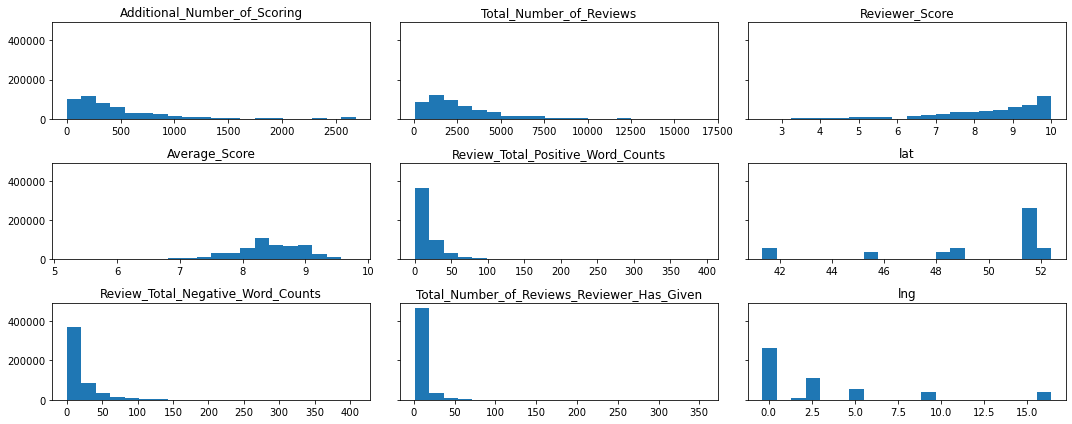

In [60]:
fig, ax = plt.subplots(3,3,figsize= (15,6), sharey = True)
cols = ['Additional_Number_of_Scoring','Average_Score','Review_Total_Negative_Word_Counts','Total_Number_of_Reviews','Review_Total_Positive_Word_Counts','Total_Number_of_Reviews_Reviewer_Has_Given','Reviewer_Score','lat','lng']
for i in range(9):
    col = cols[i]
    sbplt = ax[i%3, math.floor(i/3)]
    sbplt.hist(df[col],bins = 20)
    sbplt.set_title(col)
    
fig.tight_layout()
fig.savefig('hists.png')

In [61]:
len(df) - df.count()

Hotel_Address                                      0
Additional_Number_of_Scoring                       0
Review_Date                                        0
Average_Score                                      0
Hotel_Name                                         0
Reviewer_Nationality                               0
Negative_Review                               127890
Review_Total_Negative_Word_Counts                  0
Total_Number_of_Reviews                            0
Positive_Review                                35946
Review_Total_Positive_Word_Counts                  0
Total_Number_of_Reviews_Reviewer_Has_Given         0
Reviewer_Score                                     0
Tags                                               0
days_since_review                                  0
lat                                                0
lng                                                0
dtype: int64

In [62]:
df[df['lat'].isna()]['Hotel_Address'].unique()

array([], dtype=object)

In [63]:
wrong_hotels = list(df[df['lat'].isna()]['Hotel_Name'].unique())

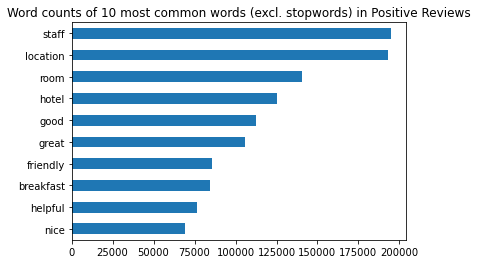

In [91]:
words = df['Positive_Review_clean'].str.lower().str.split(expand=True)
word_counts = words.stack().value_counts().head(10)
word_counts.sort_values(ascending=True).plot.barh()
plt.title('Word counts of 10 most common words (excl. stopwords) in Positive Reviews');
plt.savefig('pos_wordcount.png')

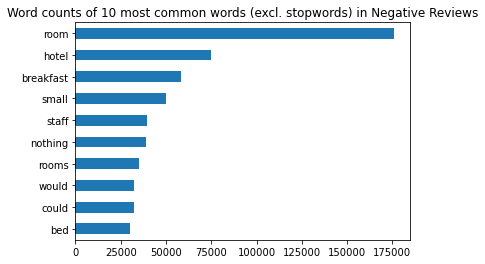

In [92]:
df['Negative_Review_clean'].str.lower().str.split(expand=True).stack().value_counts().head(10).sort_values(ascending=True).plot.barh()
plt.title('Word counts of 10 most common words (excl. stopwords) in Negative Reviews');
plt.savefig('neg_wordcount.png')

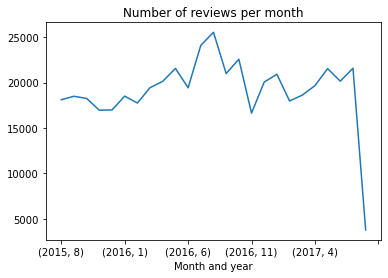

In [103]:
df.groupby([df.Review_Date.dt.year, df.Review_Date.dt.month])['Positive_Review'].count().plot.line()
plt.xlabel('Month and year')
plt.title('Number of reviews per month')
plt.savefig('reviews_per_month.png')